# Google Mobility data

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#Google Mobility data: https://www.google.com/covid19/mobility/
gmr_df = pd.read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv')
gmr_df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [2]:
# Categories available
categories_google_mobility = ['retail_and_recreation_percent_change_from_baseline',
 'grocery_and_pharmacy_percent_change_from_baseline',
 'parks_percent_change_from_baseline',
 'transit_stations_percent_change_from_baseline',
 'workplaces_percent_change_from_baseline',
 'residential_percent_change_from_baseline']

In [12]:
sub_df = gmr_df[(gmr_df['country_region']== 'Sweden')]
sub_df = sub_df[(sub_df['sub_region_1']=='Stockholm County')]
sub_df = sub_df[(sub_df['sub_region_2']=='Stockholm Municipality')]
sub_df['metro_area'].unique()

array([nan], dtype=object)

**COVID-19 cases in Stockholm**

In [13]:
# Subset of data from Stockholm
country = 'Sweden'
region1 = 'Stockholm County'
region2 = 'Stockholm Municipality'
sub_df = gmr_df[(gmr_df['country_region']== country)&(gmr_df['sub_region_1']==region1)&(gmr_df['sub_region_2']==region2)]
sub_df.loc[:,'date'] = pd.to_datetime(sub_df.loc[:,'date'])
sub_df = sub_df.sort_values('date', ascending=True)
sub_df.head()
#Save to file:
#sub_df.to_excel(r'C:\Untitled Folder\googledata.xlsx', index = False, header=True)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
7471698,SE,Sweden,Stockholm County,Stockholm Municipality,NaN,NaN,NaN,ChIJ53K_LD12X0YRbtKIXBM4QW4,2020-02-15,6.0,0.0,-1.0,8.0,-1.0,1.0
7471699,SE,Sweden,Stockholm County,Stockholm Municipality,NaN,NaN,NaN,ChIJ53K_LD12X0YRbtKIXBM4QW4,2020-02-16,-7.0,-5.0,-22.0,-3.0,-3.0,2.0
7471700,SE,Sweden,Stockholm County,Stockholm Municipality,NaN,NaN,NaN,ChIJ53K_LD12X0YRbtKIXBM4QW4,2020-02-17,-3.0,0.0,1.0,-1.0,1.0,1.0
7471701,SE,Sweden,Stockholm County,Stockholm Municipality,NaN,NaN,NaN,ChIJ53K_LD12X0YRbtKIXBM4QW4,2020-02-18,1.0,1.0,9.0,-1.0,2.0,0.0
7471702,SE,Sweden,Stockholm County,Stockholm Municipality,NaN,NaN,NaN,ChIJ53K_LD12X0YRbtKIXBM4QW4,2020-02-19,2.0,2.0,22.0,0.0,2.0,0.0


In [14]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 7471698 to 7472586
Data columns (total 15 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   country_region_code                                 889 non-null    object        
 1   country_region                                      889 non-null    object        
 2   sub_region_1                                        889 non-null    object        
 3   sub_region_2                                        889 non-null    object        
 4   metro_area                                          0 non-null      object        
 5   iso_3166_2_code                                     0 non-null      object        
 6   census_fips_code                                    0 non-null      float64       
 7   place_id                                            889 non-null    object        
 8   

retail_and_recreation_percent_change_from_baseline


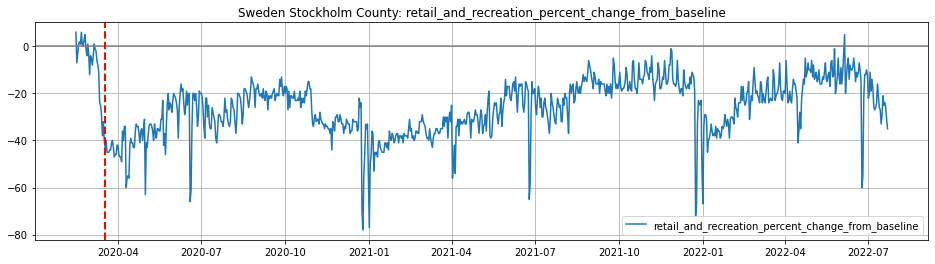

grocery_and_pharmacy_percent_change_from_baseline


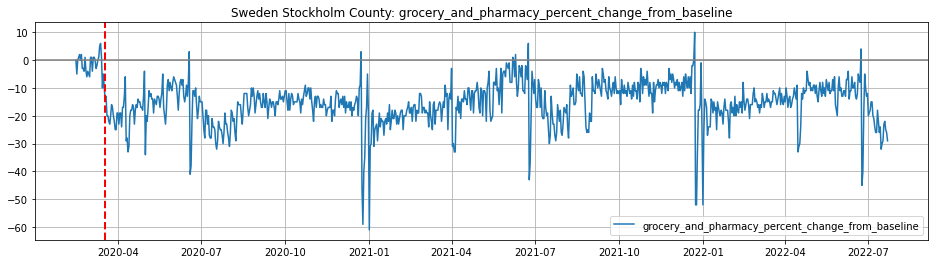

parks_percent_change_from_baseline


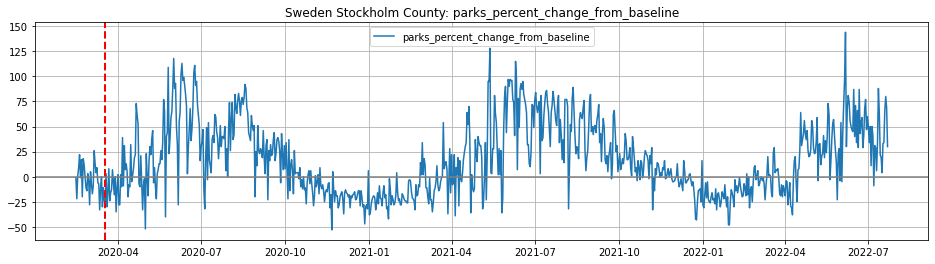

transit_stations_percent_change_from_baseline


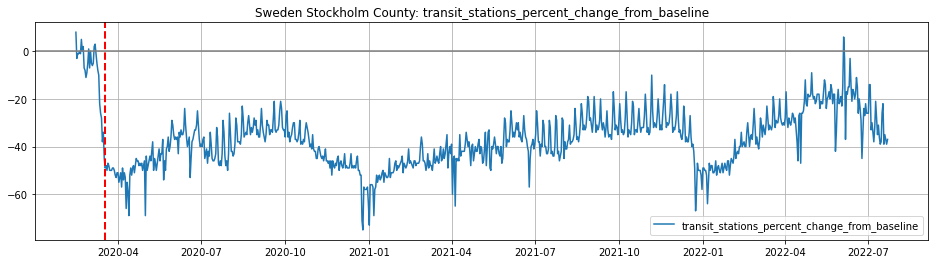

workplaces_percent_change_from_baseline


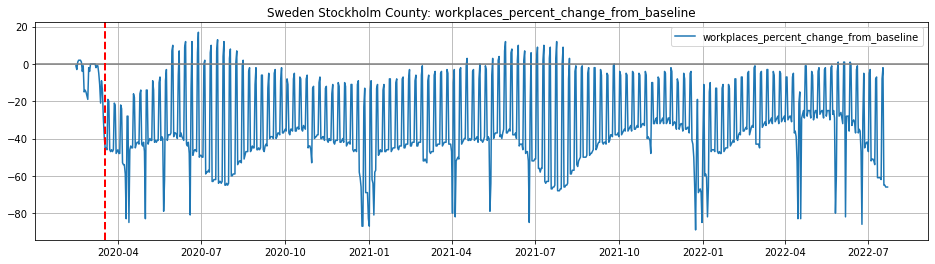

residential_percent_change_from_baseline


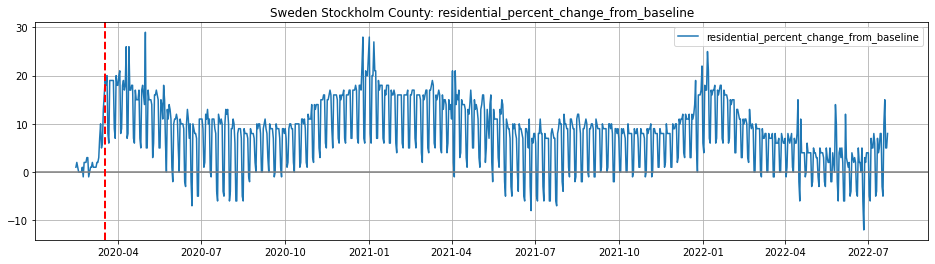

In [15]:
# let's plot all time series for this region
for group in categories_google_mobility:
    print(group)
#Sweden declared lockdown in March 2020 and strong restrictions in October (infection control rules)
    fig, ax = plt.subplots(figsize=(16, 4))
    plt.plot(sub_df['date'], sub_df[group], label=group)
    ax.axhline(y=0, color='gray')
    ax.axvline(pd.to_datetime('2020-03-18'), color='r', linestyle='--', lw=2)
    plt.title(country + ' '+ region + ': ' + group)
    plt.legend(loc='best') 
    plt.grid()
    plt.show()   

# Google Trends

In [34]:
#Google Trends: https://trends.google.com/trends/explore?date=2019-01-01%202022-07-25&geo=SE-AB&q=%2Fg%2F11j2cc_qll
Covid_rules = pd.read_csv('Covid_rules_Sto.csv', header = 1)
#Covid_rules.reset_index(inplace = True)
Covid_rules.head()

,Week,Coronavirus disease 2019: (Stockholm County)
0,2019-01-06,0
1,2019-01-13,<1
2,2019-01-20,<1
3,2019-01-27,0
4,2019-02-03,0


In [35]:
Covid_rules['Week'] = pd.to_datetime(Covid_rules['Week'])
Covid_rules = Covid_rules[Covid_rules['Week'] > '2019-02-18']
Covid_rules = Covid_rules.sort_values('Week', ascending=True)
Covid_rules.head()

,Week,Coronavirus disease 2019: (Stockholm County)
7,2019-02-24,<1
8,2019-03-03,0
9,2019-03-10,0
10,2019-03-17,<1
11,2019-03-24,0


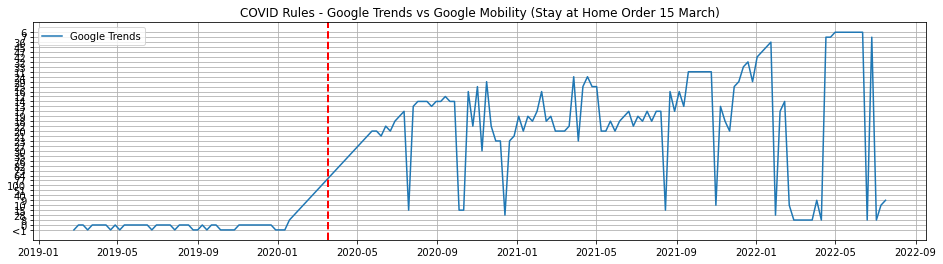

In [36]:
fig, ax = plt.subplots(figsize=(16, 4))
plt.plot(Covid_rules['Week'], Covid_rules['Coronavirus disease 2019: (Stockholm County)'], label='Google Trends')
plt.title('COVID Rules - Google Trends vs Google Mobility (Stay at Home Order 15 March)')
plt.legend(loc='best') 
ax.axvline(pd.to_datetime('2020-03-18'), color='r', linestyle='--', lw=2)
plt.grid()

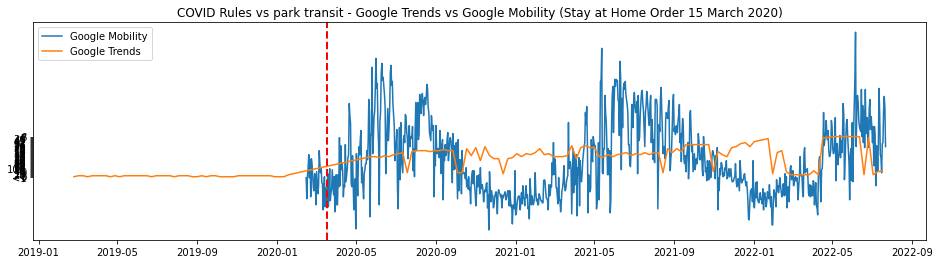

In [38]:
#Overlap trends with actual transit data for google
sub_df = gmr_df[(gmr_df['country_region']== 'Sweden')]
sub_df = sub_df[(sub_df['sub_region_1']=='Stockholm County')]
gmr_df_tmp = sub_df[(sub_df['sub_region_2']=='Stockholm Municipality')]
gmr_df_tmp = gmr_df_tmp.groupby(['date','sub_region_1']).mean().reset_index()
gmr_df_tmp['date'] = pd.to_datetime(gmr_df_tmp['date'])
fig, ax = plt.subplots(figsize=(16, 4))
plt.plot(gmr_df_tmp['date'], gmr_df_tmp['parks_percent_change_from_baseline'], label='Google Mobility')
plt.plot(Covid_rules['Week'], Covid_rules['Coronavirus disease 2019: (Stockholm County)'], label='Google Trends')
plt.title('COVID Rules vs park transit - Google Trends vs Google Mobility (Stay at Home Order 15 March 2020)')
plt.legend(loc='best') 
ax.axvline(pd.to_datetime('2020-03-18'), color='r', linestyle='--', lw=2)
plt.grid()

# Apple Mobility data

In [40]:
#Apple Mobility data: https://covid19.apple.com/mobility
amr_df = pd.read_csv('applemobilitytrends-2021-09-14.csv')
amr_df.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2021-09-05,2021-09-06,2021-09-07,2021-09-08,2021-09-09,2021-09-10,2021-09-11,2021-09-12,2021-09-13,2021-09-14
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,265.40,244.24,227.55,230.34,214.59,215.88,217.64,223.22,198.98,186.09
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,251.56,278.89,285.03,302.35,256.89,260.38,246.74,238.21,283.75,245.80
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,72.12,73.03,74.61,77.19,85.57,116.62,119.74,99.47,70.17,77.16
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,52.60,68.94,64.01,65.49,78.34,101.21,93.36,91.17,66.20,74.60
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,78.33,81.19,84.53,86.12,91.51,85.16,69.19,80.55,83.19,86.94


In [41]:
amr_df_tmp = amr_df[amr_df['region'] == 'Stockholm']
amr_df_tmp.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2021-09-05,2021-09-06,2021-09-07,2021-09-08,2021-09-09,2021-09-10,2021-09-11,2021-09-12,2021-09-13,2021-09-14
825,city,Stockholm,driving,NaN,Stockholm County,Sweden,100.0,100.55,101.06,103.22,...,146.37,128.05,130.59,134.67,134.03,142.66,147.00,136.55,123.66,127.13
826,city,Stockholm,transit,NaN,Stockholm County,Sweden,100.0,98.06,100.44,103.23,...,142.89,130.42,131.97,138.60,136.92,143.42,141.08,128.70,123.68,131.28
827,city,Stockholm,walking,NaN,Stockholm County,Sweden,100.0,101.26,112.11,107.66,...,129.85,123.41,130.12,137.98,137.52,151.12,157.72,113.39,119.21,128.43


In [42]:
set(amr_df['transportation_type'])

{'driving', 'transit', 'walking'}

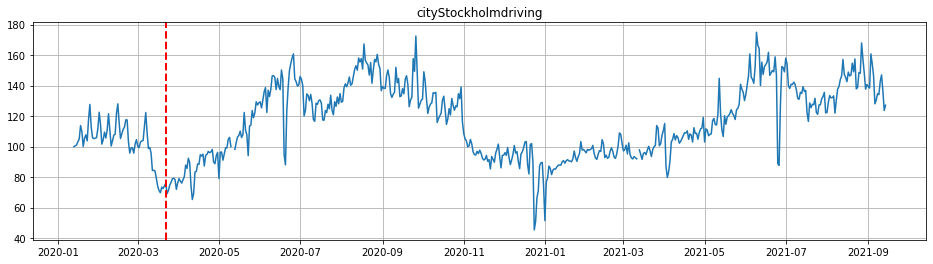

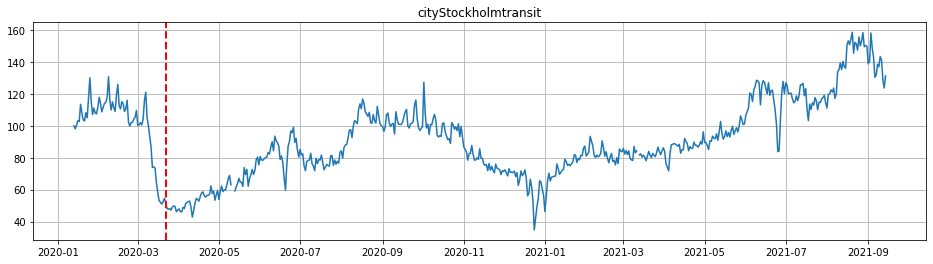

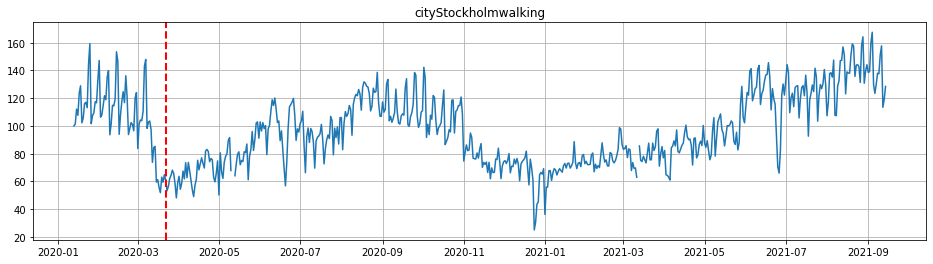

In [43]:
for i,r in amr_df_tmp.iterrows():
    fig, ax = plt.subplots(figsize=(16, 4))
    
    title = r[0] + r[1] + r[2]
    df = pd.DataFrame({'Date':r.index[6:], 'Activity':[float(f) for f in list(r.values[6:])]})
    df['Date'] = pd.to_datetime(df['Date'])
        
    plt.title(title)
    plt.grid()
    plt.plot(df['Date'], df['Activity'])
    ax.axvline(pd.to_datetime('2020-03-18'), color='r', linestyle='--', lw=2)